## 1. 베이즈 이론 및 베이즈 분류기에 대해 설명하시오.

### 베이즈 이론
##### 종속적 관계에 놓인 사건들을 기반으로 확률을 구함.
##### 두 확률 변수의 사전 확률과 사후 확률사이의 관계를 나타내는 정리

### 베이즈 분류기
#### 베이즈 정리에 기반한 통계적 분류 기법
#### feature끼리 서로 독립이라는 조건이 필요
 

## 2. 이메일에 ‘나이트’라는 단어가 검출되었을 때의 스팸 확률을 수식으로 작성하시오. (베이즈 이론 수식에서 사후확률을 기술하시오)
### P(스팸|나이트)= P(스팸, 나이트)/P(나이트) -> P(스팸|나이트)P(나이트)
### <=>
### 사후확률 = P(나이트|스팸)P(스팸)/P(나이트)

#### 사전 확률 : P(스팸)
#### 사후 확률 : P(스팸|나이트) = P(나이트|스팸)P(스팸)/P(나이트)
#### 가능도 : P(나이트|스팸) 

## 3. 나이브 베이지안 분류기가 응용되는 예를 드시오.

#### 스팸메일, 텍스트 분류, 감정 분석, 추천 시스템 등에 활용

## 4. abalone 데이터셋을 이용하여 다음 알고리즘을 바탕으로 성별(M/F)를 분류할 수 있는 모델을 만들고, 예측해보시오.
### - 데이터 주소 : https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/
### - abalone.data 다운로드
### - 데이터 설명 : abalone.names
### - training/test 데이터를 7:3의 비율로 분할(random_state 값은 모두 1008로 설정)
### - 모델 생성후 test 데이터로 정확도 측정 및 출력
### - 사용 알고리즘 종류 : SVM, 랜덤포레스트, 의사결정트리, knn
### - 모든 알고리즘의 parameter 튜닝을 해주시기 바랍니다.
### - 전처리 및 분석, 시각화 작업도 반드시 해주세요

In [726]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [727]:
df = pd.read_csv("abalone.data", sep=',' , names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [728]:
df['Age'] = df['Rings'] + 1.5
df.drop('Rings', axis = 1, inplace = True)

In [729]:
train, test = train_test_split(df, test_size = 0.3, random_state= 1008)

In [730]:
train.shape

(2923, 9)

In [731]:
test.shape

(1254, 9)

In [732]:
train.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1726,F,0.660,0.535,0.175,1.5175,0.7110,0.3125,0.4150,13.5
2639,I,0.460,0.370,0.120,0.5335,0.2645,0.1080,0.1345,7.5
57,M,0.470,0.385,0.135,0.5895,0.2765,0.1200,0.1700,9.5
2600,F,0.615,0.485,0.160,1.1575,0.5005,0.2495,0.3150,11.5
3333,I,0.450,0.360,0.125,0.4500,0.1910,0.0865,0.1450,13.5


In [733]:
train.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
2324,F,0.665,0.535,0.190,1.4960,0.5775,0.2815,0.475,18.5
2643,I,0.485,0.375,0.130,0.5535,0.2660,0.1120,0.157,9.5
2193,I,0.215,0.170,0.055,0.0605,0.0205,0.0140,0.020,7.5
3177,F,0.505,0.410,0.135,0.6570,0.2910,0.1330,0.195,16.5
1304,M,0.535,0.435,0.150,0.7170,0.3475,0.1445,0.194,10.5


In [734]:
test.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
898,I,0.280,0.120,0.075,0.1170,0.0455,0.0290,0.0345,5.5
1191,M,0.695,0.560,0.185,1.7400,0.8850,0.3715,0.4375,11.5
1365,M,0.610,0.475,0.170,1.0265,0.4350,0.2335,0.3035,11.5
3918,F,0.645,0.490,0.190,1.3065,0.4790,0.3565,0.3450,19.5
1096,I,0.475,0.350,0.100,0.4545,0.2165,0.1110,0.1150,8.5


In [735]:
test.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
3034,M,0.54,0.420,0.190,0.6855,0.2930,0.1630,0.3800,11.5
1448,I,0.44,0.365,0.110,0.4465,0.2130,0.0890,0.1135,10.5
1913,M,0.58,0.440,0.160,0.8295,0.3365,0.2005,0.2485,10.5
3366,M,0.28,0.210,0.065,0.0905,0.0350,0.0200,0.0300,6.5
2280,M,0.44,0.375,0.130,0.4870,0.2260,0.0965,0.1550,10.5


In [736]:
train.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,0.523529,0.407752,0.139140,0.824742,0.357319,0.179776,0.238117,11.463052
std,0.120761,0.099601,0.042774,0.487451,0.221653,0.108671,0.138319,3.261793
min,0.110000,0.090000,0.000000,0.008000,0.002500,0.000500,0.003000,4.500000
25%,0.450000,0.350000,0.115000,0.440750,0.185750,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.335500,0.171000,0.231500,10.500000
75%,0.615000,0.480000,0.165000,1.146000,0.497000,0.252500,0.327250,12.500000
max,0.800000,0.630000,1.130000,2.825500,1.488000,0.590000,1.005000,30.500000


In [737]:
test.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.525072,0.408182,0.140395,0.838066,0.364143,0.182500,0.240494,11.365231
std,0.118562,0.098431,0.039534,0.497242,0.222699,0.111803,0.141282,3.134931
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.445000,0.189750,0.092500,0.130000,9.500000
50%,0.540000,0.425000,0.145000,0.799250,0.336250,0.170000,0.235000,10.500000
75%,0.615000,0.480000,0.170000,1.168125,0.513875,0.254750,0.330000,12.500000
max,0.815000,0.650000,0.515000,2.779500,1.348500,0.760000,0.885000,28.500000


In [738]:
train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

In [739]:
test.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

In [740]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 1726 to 1304
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2923 non-null   object 
 1   Length          2923 non-null   float64
 2   Diameter        2923 non-null   float64
 3   Height          2923 non-null   float64
 4   Whole_weight    2923 non-null   float64
 5   Shucked_weight  2923 non-null   float64
 6   Viscera_weight  2923 non-null   float64
 7   Shell_weight    2923 non-null   float64
 8   Age             2923 non-null   float64
dtypes: float64(8), object(1)
memory usage: 228.4+ KB


In [741]:
train.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [742]:
train.drop('Sex', axis =1).describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,0.523529,0.407752,0.139140,0.824742,0.357319,0.179776,0.238117,11.463052
std,0.120761,0.099601,0.042774,0.487451,0.221653,0.108671,0.138319,3.261793
min,0.110000,0.090000,0.000000,0.008000,0.002500,0.000500,0.003000,4.500000
25%,0.450000,0.350000,0.115000,0.440750,0.185750,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.335500,0.171000,0.231500,10.500000
75%,0.615000,0.480000,0.165000,1.146000,0.497000,0.252500,0.327250,12.500000
max,0.800000,0.630000,1.130000,2.825500,1.488000,0.590000,1.005000,30.500000


In [743]:
target = train.Sex.copy()
target

1726    F
2639    I
57      M
2600    F
3333    I
       ..
2324    F
2643    I
2193    I
3177    F
1304    M
Name: Sex, Length: 2923, dtype: object

In [744]:
result = test.Sex.copy()
result

898     I
1191    M
1365    M
3918    F
1096    I
       ..
3034    M
1448    I
1913    M
3366    M
2280    M
Name: Sex, Length: 1254, dtype: object

In [745]:
target.value_counts()

M    1062
I     931
F     930
Name: Sex, dtype: int64

In [746]:
train.drop('Sex', axis=1).columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Age'],
      dtype='object')

In [747]:
test.drop('Sex',axis=1).columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Age'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='count'>

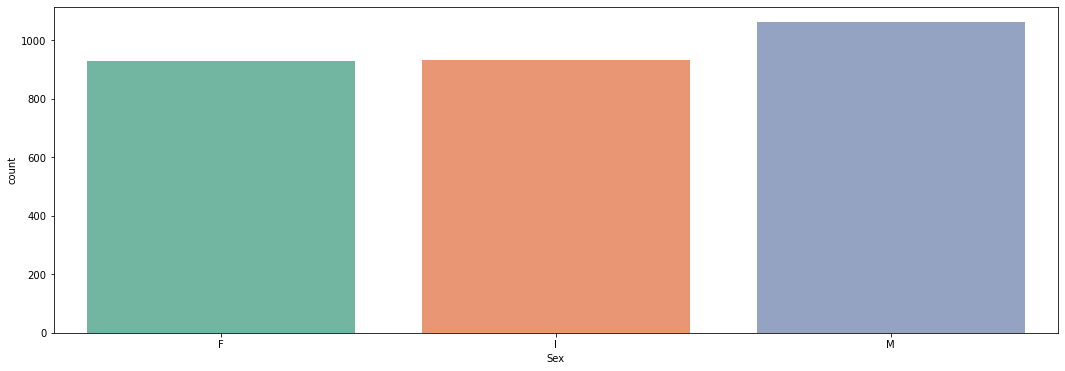

In [748]:
plt.figure(figsize= (18,6))
sns.countplot(x = train.Sex, palette = 'Set2')

C:\Users\kazio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kazio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kazio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

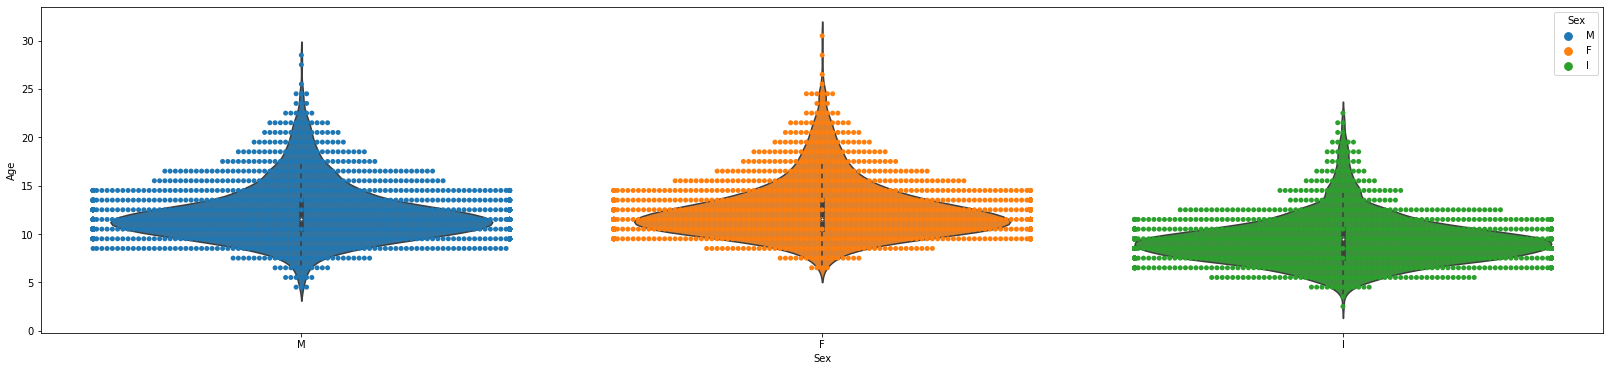

In [749]:
plt.figure(figsize = (28,6))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

In [750]:
def plot_grid(data, fig_size, grid_size, plot_type, target = ''): 
    fig=plt.figure(figsize=fig_size)  
    if plot_type=='histplot':
        for i, column_name in enumerate(data.select_dtypes(exclude='object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i+1)
            sns.histplot(data[column_name], kde=True, color='royalblue')
    if plot_type=='boxplot':
        for i, column_name in enumerate(data.select_dtypes(exclude='object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i+1)
            sns.boxplot(data[column_name], color='royalblue')            
    if plot_type=='countplot':
        target=data[target]
        for i, column_name in enumerate(data.drop(target.name, axis=1).columns):
            fig.add_subplot(grid_size[0], grid_size[1], i+1)
            sns.countplot(data[column_name],hue=target)             

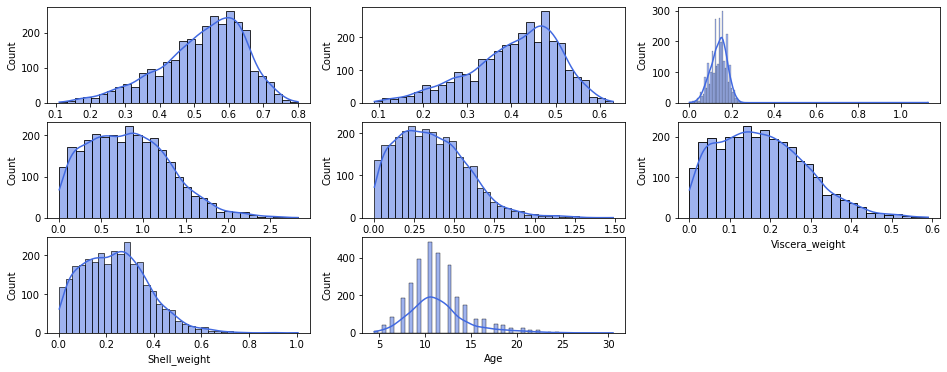

In [751]:
plot_grid(train.drop('Sex', axis=1), (16,6), (3,3), 'histplot')

In [752]:
train.pivot_table(index = ['Sex'])

,Age,Diameter,Height,Length,Shell_weight,Shucked_weight,Viscera_weight,Whole_weight
Sex,,,,,,,,
F,12.704301,0.453274,0.157306,0.576398,0.298568,0.439011,0.227423,1.032296
I,9.363588,0.325720,0.107240,0.426445,0.127376,0.189370,0.091437,0.428680
M,12.216573,0.439802,0.151196,0.562340,0.282261,0.433012,0.215493,0.990194


<AxesSubplot:>

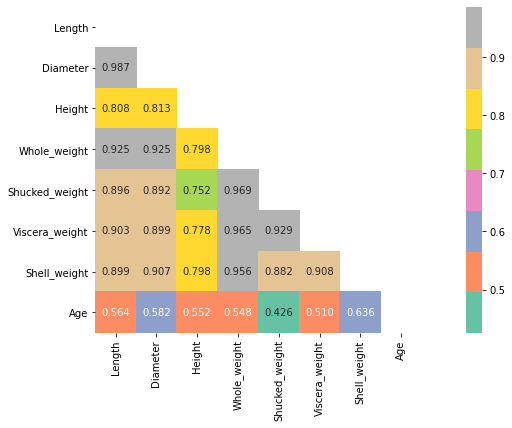

In [753]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(), annot = True, mask = np.triu(train.corr()), cmap = 'Set2', fmt='.3f',square = True)

## 분석결과


### I는 나이가 어려 모든부분에서 작다
### Female이 Male 보다 전반적으로 모든 부분에서 크지만 평균연령이 높아서..

### Male : 대부분의 연령는 7.5세에서 19세 사이
### Female : 대부분의 연령은 8세에서 19세 사이
### Immature : 대부분의 연령은 6세에서 10세 사이

In [754]:
train_test = pd.concat([train, test], keys = ['train', 'test'], axis = 0)

In [755]:
train_test

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
train 1726   F   0.660     0.535   0.175        1.5175          0.7110   
      2639   I   0.460     0.370   0.120        0.5335          0.2645   
      57     M   0.470     0.385   0.135        0.5895          0.2765   
      2600   F   0.615     0.485   0.160        1.1575          0.5005   
      3333   I   0.450     0.360   0.125        0.4500          0.1910   
...         ..     ...       ...     ...           ...             ...   
test  3034   M   0.540     0.420   0.190        0.6855          0.2930   
      1448   I   0.440     0.365   0.110        0.4465          0.2130   
      1913   M   0.580     0.440   0.160        0.8295          0.3365   
      3366   M   0.280     0.210   0.065        0.0905          0.0350   
      2280   M   0.440     0.375   0.130        0.4870          0.2260   

            Viscera_weight  Shell_weight   Age  
train 1726          0.3125        0.4150  13.5  
      2639          0.1080        0.1345   7.5  
      57            0.1200        0.1700   9.5  
      2600          0.2495        0.3150  11.5  
      3333          0.0865        0.1450  13.5  
...                    ...           ...   ...  
test  3034          0.1630        0.3800  11.5  
      1448          0.0890        0.1135  10.5  
      1913          0.2005        0.2485  10.5  
      3366          0.0200        0.0300   6.5  
      2280          0.0965        0.1550  10.5  

[4177 rows x 9 columns]

In [756]:
# train_cleaning = train.drop('Sex', axis = 1).copy()
# test_cleaning = test.drop('Sex', axis = 1).copy()
train_cleaning = train.copy()
test_cleaning = test.copy()

train_cleaning

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1726,F,0.660,0.535,0.175,1.5175,0.7110,0.3125,0.4150,13.5
2639,I,0.460,0.370,0.120,0.5335,0.2645,0.1080,0.1345,7.5
57,M,0.470,0.385,0.135,0.5895,0.2765,0.1200,0.1700,9.5
2600,F,0.615,0.485,0.160,1.1575,0.5005,0.2495,0.3150,11.5
3333,I,0.450,0.360,0.125,0.4500,0.1910,0.0865,0.1450,13.5
...,...,...,...,...,...,...,...,...,...
2324,F,0.665,0.535,0.190,1.4960,0.5775,0.2815,0.4750,18.5
2643,I,0.485,0.375,0.130,0.5535,0.2660,0.1120,0.1570,9.5
2193,I,0.215,0.170,0.055,0.0605,0.0205,0.0140,0.0200,7.5
3177,F,0.505,0.410,0.135,0.6570,0.2910,0.1330,0.1950,16.5


In [757]:
test_cleaning

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
898,I,0.280,0.120,0.075,0.1170,0.0455,0.0290,0.0345,5.5
1191,M,0.695,0.560,0.185,1.7400,0.8850,0.3715,0.4375,11.5
1365,M,0.610,0.475,0.170,1.0265,0.4350,0.2335,0.3035,11.5
3918,F,0.645,0.490,0.190,1.3065,0.4790,0.3565,0.3450,19.5
1096,I,0.475,0.350,0.100,0.4545,0.2165,0.1110,0.1150,8.5
...,...,...,...,...,...,...,...,...,...
3034,M,0.540,0.420,0.190,0.6855,0.2930,0.1630,0.3800,11.5
1448,I,0.440,0.365,0.110,0.4465,0.2130,0.0890,0.1135,10.5
1913,M,0.580,0.440,0.160,0.8295,0.3365,0.2005,0.2485,10.5
3366,M,0.280,0.210,0.065,0.0905,0.0350,0.0200,0.0300,6.5


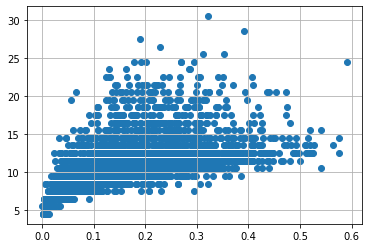

In [758]:
var = 'Viscera_weight'
plt.scatter(x = train_cleaning[var], y = train_cleaning['Age'],)
plt.grid(True)

In [759]:
# outliers removal
train_cleaning.drop(train_cleaning[(train_cleaning['Viscera_weight']> 0.5) & (train_cleaning['Age'] < 20)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Viscera_weight']<0.5) & (train_cleaning['Age'] > 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Viscera_weight']> 0.5) & (test_cleaning['Age'] < 20)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Viscera_weight']<0.5) & (test_cleaning['Age'] > 25)].index, inplace=True)

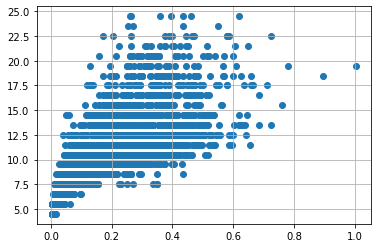

In [760]:
var = 'Shell_weight'
plt.scatter(x = train_cleaning[var], y = train_cleaning['Age'],)
plt.grid(True)

In [761]:
train_cleaning.drop(train_cleaning[(train_cleaning['Shell_weight']> 0.6) & (train_cleaning['Age'] < 25)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Shell_weight']<0.8) & (train_cleaning['Age'] > 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Shell_weight']> 0.6) & (test_cleaning['Age'] < 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Shell_weight']<0.8) & (test_cleaning['Age'] > 25)].index, inplace=True)

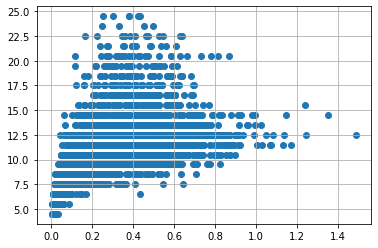

In [762]:
var = 'Shucked_weight'
plt.scatter(x = train_cleaning[var], y = train_cleaning['Age'],)
plt.grid(True)

In [763]:
train_cleaning.drop(train_cleaning[(train_cleaning['Shucked_weight']>= 1) & (train_cleaning['Age'] < 20)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Shucked_weight']<1) & (train_cleaning['Age'] > 20)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Shucked_weight']>= 1) & (test_cleaning['Age'] < 20)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Shucked_weight']<1) & (test_cleaning['Age'] > 20)].index, inplace=True)

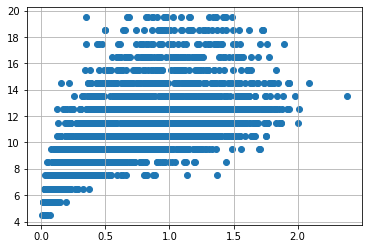

In [764]:
var = 'Whole_weight'
plt.scatter(x = train_cleaning[var], y = train_cleaning['Age'],)
plt.grid(True)

In [765]:
train_cleaning.drop(train_cleaning[(train_cleaning['Whole_weight']>= 2.5) & (train_cleaning['Age'] < 25)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Whole_weight']<2.5) & (train_cleaning['Age'] > 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Whole_weight']>= 2.5) & (test_cleaning['Age'] < 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Whole_weight']<2.5) & (test_cleaning['Age'] > 25)].index, inplace=True)

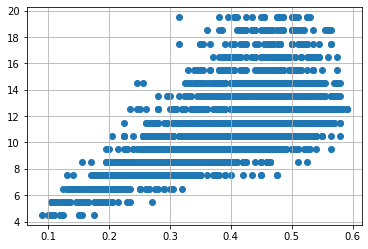

In [766]:
var = 'Diameter'
plt.scatter(x = train_cleaning[var], y = train_cleaning['Age'],)
plt.grid(True)

In [767]:
train_cleaning.drop(train_cleaning[(train_cleaning['Diameter']<0.1) & (train_cleaning['Age'] < 5)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Diameter']<0.6) & (train_cleaning['Age'] > 25)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Diameter']>=0.6) & (train_cleaning['Age']< 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Diameter']<0.1) & (test_cleaning['Age'] < 5)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Diameter']<0.6) & (test_cleaning['Age'] > 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Diameter']>=0.6) & (test_cleaning['Age']< 25)].index, inplace=True)

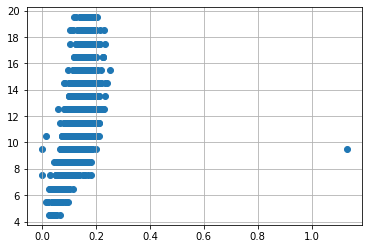

In [768]:
var = 'Height'
plt.scatter(x = train_cleaning[var], y = train_cleaning['Age'],)
plt.grid(True)

In [769]:
train_cleaning.drop(train_cleaning[(train_cleaning['Height']>0.4) & (train_cleaning['Age'] < 15)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Height']<0.4) & (train_cleaning['Age'] > 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Height']>0.4) & (test_cleaning['Age'] < 15)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Height']<0.4) & (test_cleaning['Age'] > 25)].index, inplace=True)

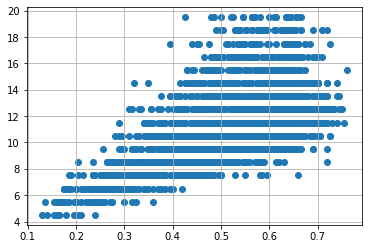

In [770]:
var = 'Length'
plt.scatter(x = train_cleaning[var], y = train_cleaning['Age'],)
plt.grid(True)

In [771]:
train_cleaning.drop(train_cleaning[(train_cleaning['Length']<0.1) & (train_cleaning['Age'] < 5)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Length']<0.8) & (train_cleaning['Age'] > 25)].index, inplace=True)
train_cleaning.drop(train_cleaning[(train_cleaning['Length']>=0.8) & (train_cleaning['Age']< 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Length']<0.1) & (test_cleaning['Age'] < 5)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Length']<0.8) & (test_cleaning['Age'] > 25)].index, inplace=True)
test_cleaning.drop(test_cleaning[(test_cleaning['Length']>=0.8) & (test_cleaning['Age']< 25)].index, inplace=True)

In [773]:
target_cleaned = train_cleaning.Sex.copy()
target_cleaned
result = test_cleaning.Sex.copy()
result

898     I
1191    M
1365    M
3918    F
1096    I
       ..
3034    M
1448    I
1913    M
3366    M
2280    M
Name: Sex, Length: 1207, dtype: object

In [774]:
X_y = pd.concat([train_cleaning.drop('Sex', axis=1), target_cleaned], axis = 1)
X_y


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Sex
1726,0.660,0.535,0.175,1.5175,0.7110,0.3125,0.4150,13.5,F
2639,0.460,0.370,0.120,0.5335,0.2645,0.1080,0.1345,7.5,I
57,0.470,0.385,0.135,0.5895,0.2765,0.1200,0.1700,9.5,M
2600,0.615,0.485,0.160,1.1575,0.5005,0.2495,0.3150,11.5,F
3333,0.450,0.360,0.125,0.4500,0.1910,0.0865,0.1450,13.5,I
...,...,...,...,...,...,...,...,...,...
2324,0.665,0.535,0.190,1.4960,0.5775,0.2815,0.4750,18.5,F
2643,0.485,0.375,0.130,0.5535,0.2660,0.1120,0.1570,9.5,I
2193,0.215,0.170,0.055,0.0605,0.0205,0.0140,0.0200,7.5,I
3177,0.505,0.410,0.135,0.6570,0.2910,0.1330,0.1950,16.5,F


In [775]:
train_cleaning = X_y.drop('Sex', axis = 1).copy()
test_cleaning = test_cleaning.drop('Sex', axis = 1).copy()

In [776]:
target_cleaned = X_y.Sex.copy()
target_cleaned


1726    F
2639    I
57      M
2600    F
3333    I
       ..
2324    F
2643    I
2193    I
3177    F
1304    M
Name: Sex, Length: 2788, dtype: object

In [777]:
train_cleaning.shape[0]
target_cleaned.shape[0]

2788

In [778]:
train_cleaning
test_cleaning
train_test_cleaning = pd.concat([train_cleaning, test_cleaning], axis = 0, keys = ['train', 'test'])
train_test_cleaning

Length  Diameter  Height  Whole_weight  Shucked_weight  \
train 1726   0.660     0.535   0.175        1.5175          0.7110   
      2639   0.460     0.370   0.120        0.5335          0.2645   
      57     0.470     0.385   0.135        0.5895          0.2765   
      2600   0.615     0.485   0.160        1.1575          0.5005   
      3333   0.450     0.360   0.125        0.4500          0.1910   
...            ...       ...     ...           ...             ...   
test  3034   0.540     0.420   0.190        0.6855          0.2930   
      1448   0.440     0.365   0.110        0.4465          0.2130   
      1913   0.580     0.440   0.160        0.8295          0.3365   
      3366   0.280     0.210   0.065        0.0905          0.0350   
      2280   0.440     0.375   0.130        0.4870          0.2260   

            Viscera_weight  Shell_weight   Age  
train 1726          0.3125        0.4150  13.5  
      2639          0.1080        0.1345   7.5  
      57            0.1200        0.1700   9.5  
      2600          0.2495        0.3150  11.5  
      3333          0.0865        0.1450  13.5  
...                    ...           ...   ...  
test  3034          0.1630        0.3800  11.5  
      1448          0.0890        0.1135  10.5  
      1913          0.2005        0.2485  10.5  
      3366          0.0200        0.0300   6.5  
      2280          0.0965        0.1550  10.5  

[3995 rows x 8 columns]

In [779]:
train_cleaning_target_cleaned=pd.concat([train_test_cleaning.xs('train'), target_cleaned],axis=1)
train_cleaning_target_cleaned

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Sex
1726,0.660,0.535,0.175,1.5175,0.7110,0.3125,0.4150,13.5,F
2639,0.460,0.370,0.120,0.5335,0.2645,0.1080,0.1345,7.5,I
57,0.470,0.385,0.135,0.5895,0.2765,0.1200,0.1700,9.5,M
2600,0.615,0.485,0.160,1.1575,0.5005,0.2495,0.3150,11.5,F
3333,0.450,0.360,0.125,0.4500,0.1910,0.0865,0.1450,13.5,I
...,...,...,...,...,...,...,...,...,...
2324,0.665,0.535,0.190,1.4960,0.5775,0.2815,0.4750,18.5,F
2643,0.485,0.375,0.130,0.5535,0.2660,0.1120,0.1570,9.5,I
2193,0.215,0.170,0.055,0.0605,0.0205,0.0140,0.0200,7.5,I
3177,0.505,0.410,0.135,0.6570,0.2910,0.1330,0.1950,16.5,F


In [780]:
train_test = pd.get_dummies(train_test_cleaning)
train_test

Length  Diameter  Height  Whole_weight  Shucked_weight  \
train 1726   0.660     0.535   0.175        1.5175          0.7110   
      2639   0.460     0.370   0.120        0.5335          0.2645   
      57     0.470     0.385   0.135        0.5895          0.2765   
      2600   0.615     0.485   0.160        1.1575          0.5005   
      3333   0.450     0.360   0.125        0.4500          0.1910   
...            ...       ...     ...           ...             ...   
test  3034   0.540     0.420   0.190        0.6855          0.2930   
      1448   0.440     0.365   0.110        0.4465          0.2130   
      1913   0.580     0.440   0.160        0.8295          0.3365   
      3366   0.280     0.210   0.065        0.0905          0.0350   
      2280   0.440     0.375   0.130        0.4870          0.2260   

            Viscera_weight  Shell_weight   Age  
train 1726          0.3125        0.4150  13.5  
      2639          0.1080        0.1345   7.5  
      57            0.1200        0.1700   9.5  
      2600          0.2495        0.3150  11.5  
      3333          0.0865        0.1450  13.5  
...                    ...           ...   ...  
test  3034          0.1630        0.3800  11.5  
      1448          0.0890        0.1135  10.5  
      1913          0.2005        0.2485  10.5  
      3366          0.0200        0.0300   6.5  
      2280          0.0965        0.1550  10.5  

[3995 rows x 8 columns]

In [781]:
X_train_full, X_test = train_test.xs('train'), train_test.xs('test')
X_train_full

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1726,0.660,0.535,0.175,1.5175,0.7110,0.3125,0.4150,13.5
2639,0.460,0.370,0.120,0.5335,0.2645,0.1080,0.1345,7.5
57,0.470,0.385,0.135,0.5895,0.2765,0.1200,0.1700,9.5
2600,0.615,0.485,0.160,1.1575,0.5005,0.2495,0.3150,11.5
3333,0.450,0.360,0.125,0.4500,0.1910,0.0865,0.1450,13.5
...,...,...,...,...,...,...,...,...
2324,0.665,0.535,0.190,1.4960,0.5775,0.2815,0.4750,18.5
2643,0.485,0.375,0.130,0.5535,0.2660,0.1120,0.1570,9.5
2193,0.215,0.170,0.055,0.0605,0.0205,0.0140,0.0200,7.5
3177,0.505,0.410,0.135,0.6570,0.2910,0.1330,0.1950,16.5


In [782]:
X_test

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
898,0.280,0.120,0.075,0.1170,0.0455,0.0290,0.0345,5.5
1191,0.695,0.560,0.185,1.7400,0.8850,0.3715,0.4375,11.5
1365,0.610,0.475,0.170,1.0265,0.4350,0.2335,0.3035,11.5
3918,0.645,0.490,0.190,1.3065,0.4790,0.3565,0.3450,19.5
1096,0.475,0.350,0.100,0.4545,0.2165,0.1110,0.1150,8.5
...,...,...,...,...,...,...,...,...
3034,0.540,0.420,0.190,0.6855,0.2930,0.1630,0.3800,11.5
1448,0.440,0.365,0.110,0.4465,0.2130,0.0890,0.1135,10.5
1913,0.580,0.440,0.160,0.8295,0.3365,0.2005,0.2485,10.5
3366,0.280,0.210,0.065,0.0905,0.0350,0.0200,0.0300,6.5


In [783]:
y_train_full=target_cleaned
y_train_full

1726    F
2639    I
57      M
2600    F
3333    I
       ..
2324    F
2643    I
2193    I
3177    F
1304    M
Name: Sex, Length: 2788, dtype: object

In [784]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [785]:
rf = RandomForestClassifier(random_state =1008)
rf

RandomForestClassifier(random_state=1008)

In [786]:
rf_params={
    'random_state':[1008],
    'max_depth':[8],
    'max_features':[7],
    'min_samples_leaf':[1],
    'min_samples_split':[2],
    'n_estimators':[50]    
}

In [787]:
grid = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1)

In [788]:
grid.fit(X_train_full, y_train_full)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1008),
             n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': [7],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [50], 'random_state': [1008]})

In [789]:
grid.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 1008}

In [790]:
rf = RandomForestClassifier(**grid.best_params_)

In [791]:
from sklearn.model_selection import cross_val_score

In [792]:
res = cross_val_score(rf, X_train_full, y_train_full, cv=10)
print(res)

[0.51971326 0.54121864 0.52329749 0.55913978 0.58064516 0.52329749
 0.59139785 0.56989247 0.51798561 0.5323741 ]


In [793]:
res.mean()

0.545896186276785

In [794]:
rf.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=8, max_features=7, n_estimators=50,
                       random_state=1008)

In [795]:
pred = rf.predict(X_test)
pred

array(['I', 'M', 'F', ..., 'M', 'I', 'I'], dtype=object)

In [796]:
from sklearn.tree import DecisionTreeClassifier

In [797]:
model=DecisionTreeClassifier(max_depth=3, random_state=1008) #최대 깊이 3
model

DecisionTreeClassifier(max_depth=3, random_state=1008)

In [798]:
model.fit(X_train_full, y_train_full)

DecisionTreeClassifier(max_depth=3, random_state=1008)

In [799]:
pred=model.predict(X_test)
pred

array(['I', 'M', 'M', ..., 'M', 'I', 'I'], dtype=object)

In [800]:
from sklearn.svm import SVC

In [801]:
def svc_param_selection(x, y, nfolds):
    svm_parameters=[{'kernel':['rbf'],
                     'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'C':[0.001,0.01,1,10,100,1000] }]
    clf=GridSearchCV(SVC(), svm_parameters, cv=nfolds)
    clf.fit(x, y)
    print(clf.best_params_)
    return clf

In [802]:
clf = svc_param_selection(X_train_full, y_train_full.values.ravel(), 10)
print(clf)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 1, 10, 100, 1000],
                          'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['rbf']}])


In [803]:
clf=SVC(C=10, gamma=1)
clf.fit(X_train_full, y_train_full)

SVC(C=10, gamma=1)

In [805]:
pred=clf.predict(X_test)

In [807]:
pred

array(['I', 'M', 'M', ..., 'F', 'I', 'I'], dtype=object)

In [808]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [809]:
max_k_range=train.shape[0]//2 
k_list=[]
for i in range(3, max_k_range, 2):
    k_list.append(i)

In [810]:
k_list

[3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,
 35

In [812]:
cross_validation_scores=[]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train_full, y_train_full.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

In [813]:
max(cross_validation_scores)

0.5462584770892963

In [814]:
b=k_list[cross_validation_scores.index(max(cross_validation_scores))]
b

27

In [815]:
knn=KNeighborsClassifier(n_neighbors=b)

In [816]:
knn.fit(X_train_full, y_train_full.values.ravel())

KNeighborsClassifier(n_neighbors=27)

In [817]:
pred=knn.predict(X_test)
pred

array(['I', 'M', 'M', ..., 'M', 'I', 'I'], dtype=object)